## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

D:\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
filename = 'Insurance premium Prediction Dataset.csv'
df = pd.read_csv(filename)
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.rename(columns = {'expenses':'charges'},inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
corr = df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
charges,0.299008,0.198576,0.067998,1.000000


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

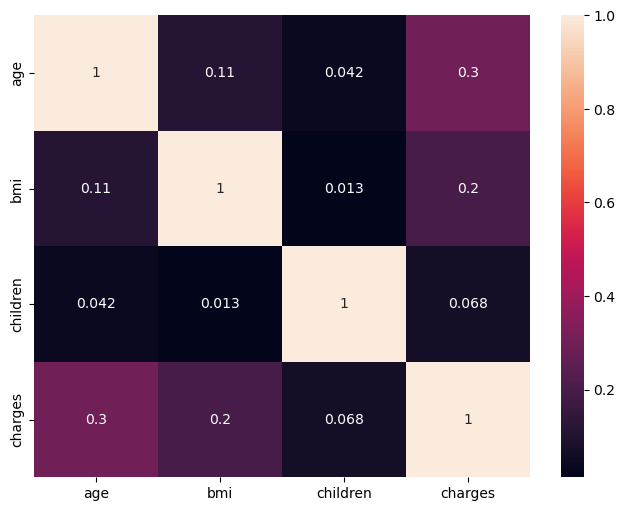

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

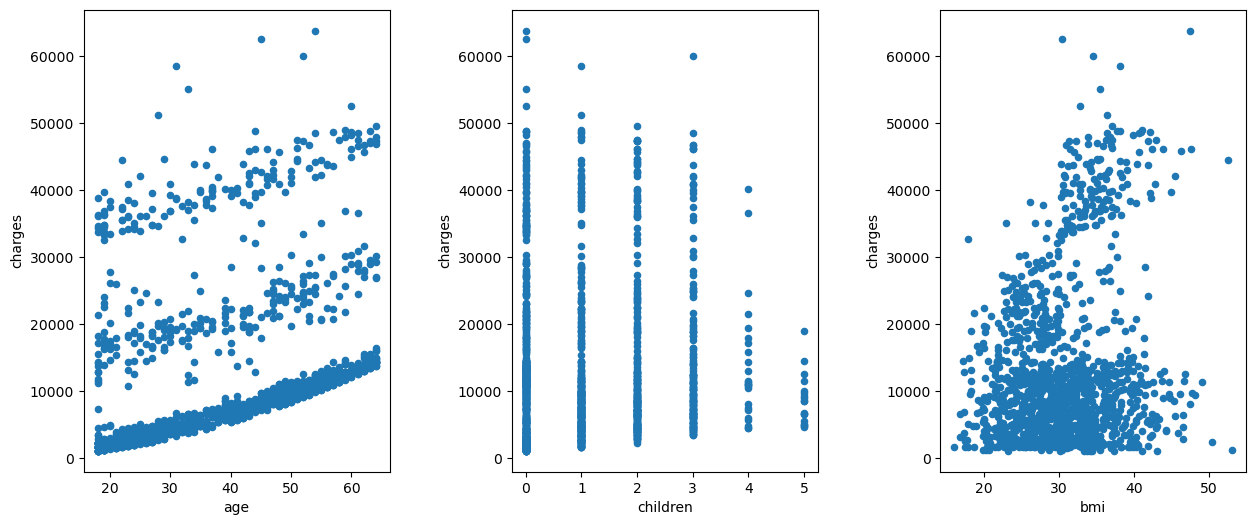

In [9]:
fig,axes = plt.subplots(ncols = 3, figsize = (15,6),squeeze = True)
plt.subplots_adjust(left=None, bottom=None,right=None,top=None,wspace=0.4,hspace=None)
df.plot(kind='scatter',x='age',y='charges',ax=axes[0])
df.plot(kind='scatter',x='children',y='charges',ax=axes[1])
df.plot(kind='scatter',x='bmi',y='charges',ax=axes[2])

<AxesSubplot:title={'center':'Charges'}, ylabel='Frequency'>

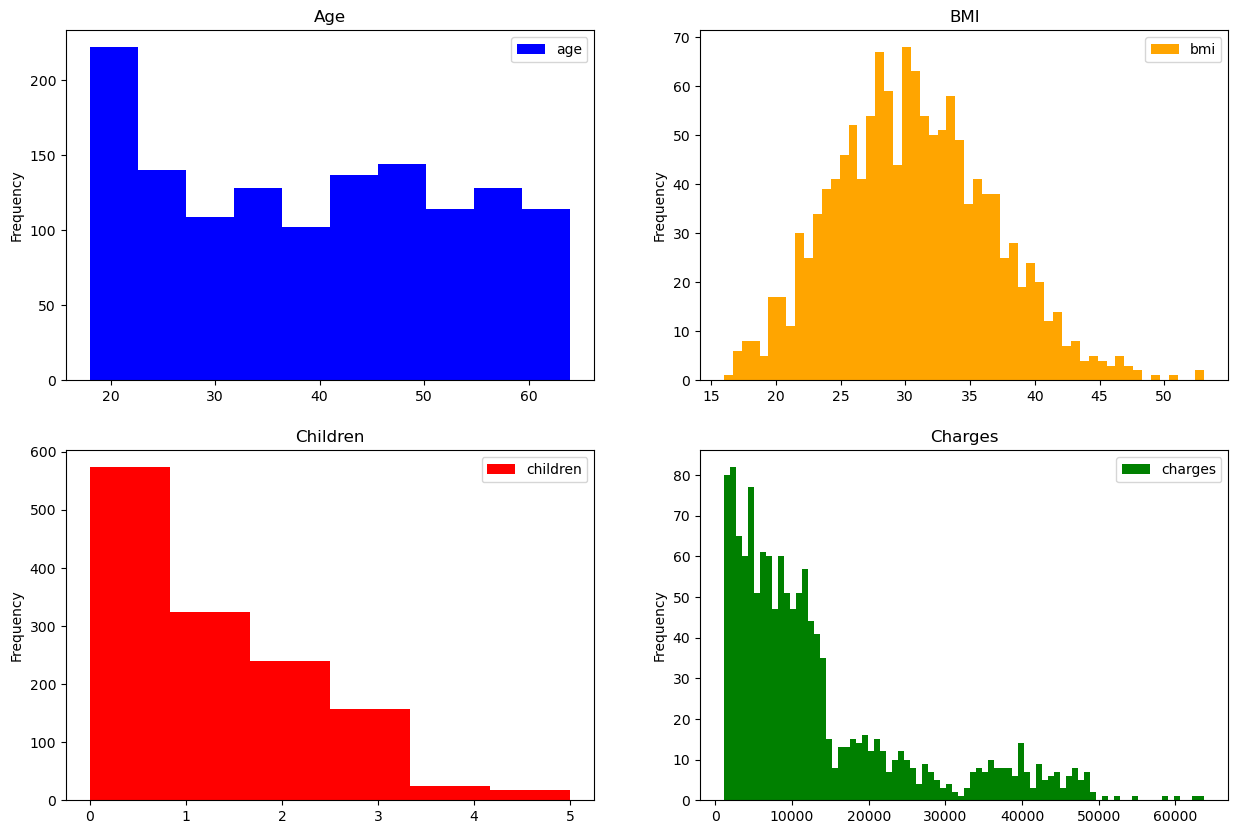

In [10]:
fig,axes = plt.subplots(nrows = 2,ncols=2, figsize = (15,10))
df.plot(kind='hist',y='age',ax=axes[0,0],color='blue',title='Age')
df.plot(kind='hist',y='bmi',ax=axes[0,1],color='orange',bins=54,title='BMI')
df.plot(kind='hist',y='children',ax=axes[1,0],color='red',bins=6,title='Children')
df.plot(kind='hist',y='charges',ax=axes[1,1],color='green',bins=80,title='Charges')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

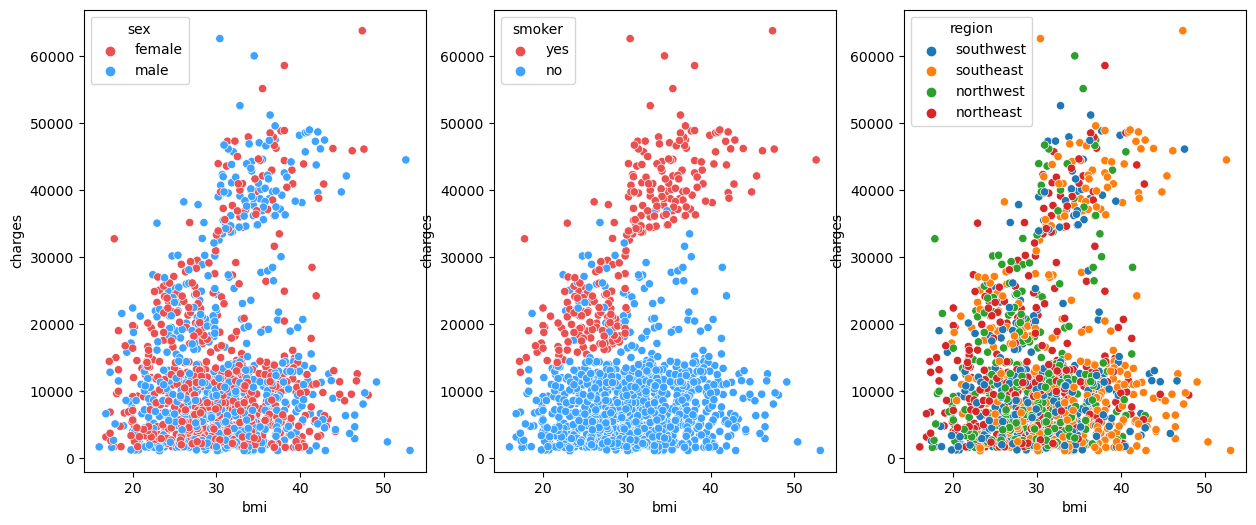

In [11]:
palette=['#EB5050','#3EA2FF']
fig,axes = plt.subplots(ncols = 3, figsize = (15,6),squeeze=True)
sns.scatterplot(x='bmi',y='charges',ax=axes[0],data=df,hue='sex',palette=palette)
sns.scatterplot(x='bmi',y='charges',ax=axes[1],data=df,hue='smoker',palette=palette)
sns.scatterplot(x='bmi',y='charges',ax=axes[2],data=df,hue='region')

<AxesSubplot:title={'center':'Smoker'}>

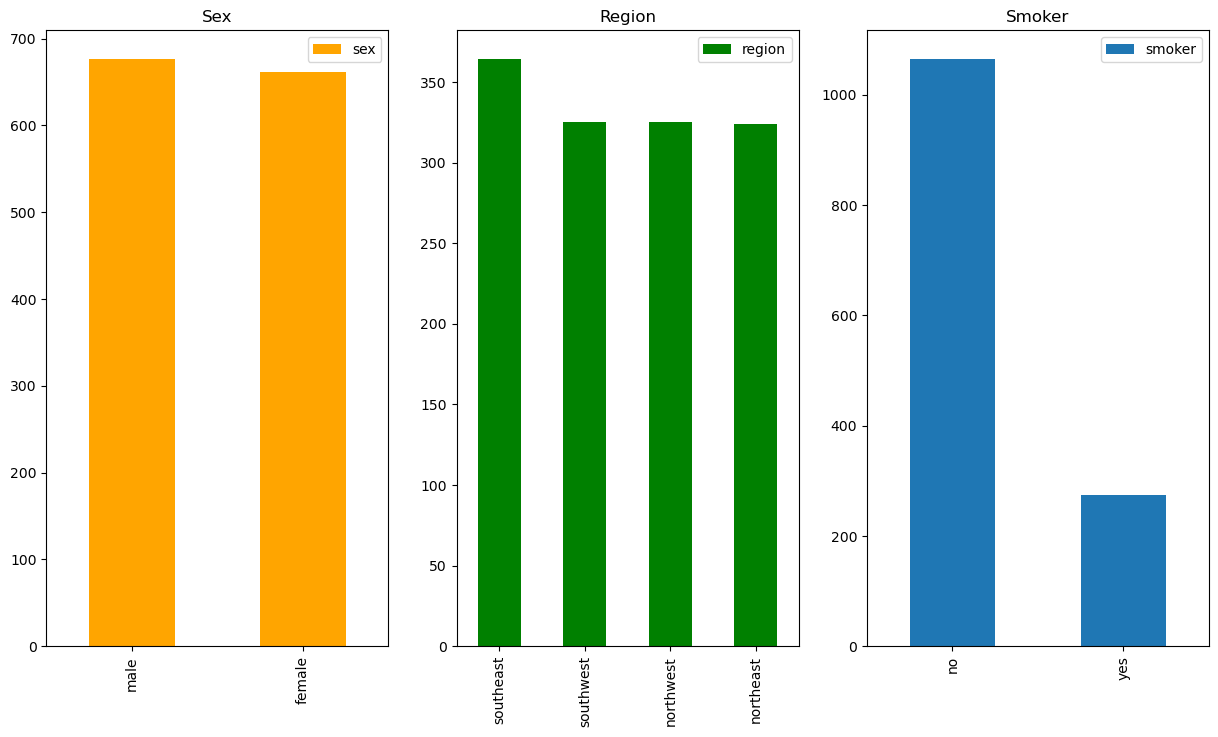

In [12]:
fig,axes = plt.subplots(ncols=3,figsize=(15,8))
df['sex'].value_counts().plot(kind='bar',color='orange',ax=axes[0],title='Sex',legend='sex')
df['region'].value_counts().plot(kind='bar',color='green',ax=axes[1],title='Region',legend='region')
df['smoker'].value_counts().plot(kind='bar',ax=axes[2],title='Smoker',legend='smoker')

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution Of Charges')

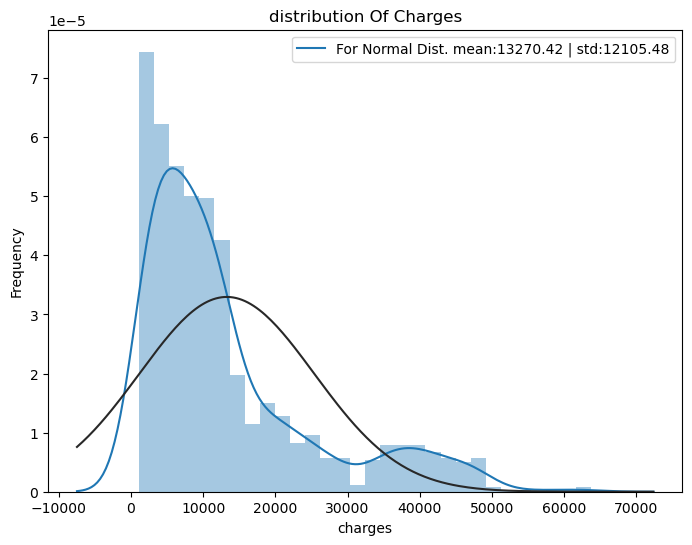

In [13]:
from scipy import stats
from scipy.stats import norm
fig = plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df['charges'],fit=norm)
(mu,sigma)=norm.fit(df['charges'])
plt.legend(['For Normal Dist. mean:{:.2f} | std:{:.2f}'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('distribution Of Charges')

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [15]:
df.drop(["region"],axis=1,inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86


In [16]:
df['sex']=df['sex'].map(lambda s:1 if s=='female'else 0)
df['smoker']=df['smoker'].map(lambda s:1 if s=='yes'else 0)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.9,0,1,16884.92
1,18,0,33.8,1,0,1725.55
2,28,0,33.0,3,0,4449.46
3,33,0,22.7,0,0,21984.47
4,32,0,28.9,0,0,3866.86


In [17]:
X = df.drop(['charges'], axis = 1)
y = df.charges
print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

Shape of X: (1338, 5)
Shape of y: (1338,)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))

result=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
result

0.7978966946106113


,Actual,Predicted
578,9724.53,11447.769722
610,8547.69,9940.228804
569,45702.02,37782.689646
1034,12950.07,15941.144968
198,9644.25,6904.401390
...,...,...
1084,15019.76,14548.018799
726,6664.69,8066.242842
1132,20709.02,15530.862695
725,40932.43,33167.676762


In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,-0.148533,-1.015067,0.544940,2.413948,1.971255
1,-1.497808,-1.015067,0.593453,-0.892195,-0.507291
2,-1.142736,0.985157,0.965391,0.760876,1.971255
3,-0.503605,-1.015067,0.722823,0.760876,-0.507291
4,1.342771,0.985157,0.270029,-0.065659,-0.507291


In [20]:
pd.DataFrame(y_train).head()

,charges
621,40182.25
194,1137.47
240,38511.63
1168,4670.64
1192,13019.16


In [21]:
def model_summary(model,model_name,cvn=20):
    print(model_name)
    y_pred_model_train = model.predict(X_train)
    y_pred_model_test = model.predict(X_test)
    accuracy_model_train = r2_score(y_train,y_pred_model_train)
    print('Training Accuracy:',accuracy_model_train)
    accuracy_model_test = r2_score(y_test, y_pred_model_test)
    print('Testing Accuracy:',accuracy_model_test)
from math import sqrt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score,mean_squared_error

In [22]:
from sklearn.linear_model import LinearRegression
multiple_linear_reg = LinearRegression(fit_intercept=False)
multiple_linear_reg.fit(X_train,y_train)
model_summary(multiple_linear_reg,'Multiple_Linear_Regression:')

Multiple_Linear_Regression:
Training Accuracy: -0.47941797245598083
Testing Accuracy: -0.3399922471571646


In [23]:
from sklearn.svm import SVR
support_vector_reg = SVR(gamma = 'auto',kernel='linear', C=1000)
support_vector_reg.fit(X_train,y_train)
model_summary(support_vector_reg ,'Support_Vector_Regression:')

Support_Vector_Regression:
Training Accuracy: 0.6541210406308183
Testing Accuracy: 0.7501188584640912


In [24]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor(max_depth=5,random_state=13)
decision_tree_reg.fit(X_train,y_train)
model_summary(decision_tree_reg,'Decision_Tree_Regression:')

Decision_Tree_Regression:
Training Accuracy: 0.8730328009717917
Testing Accuracy: 0.8360680881153844


[Text(0.5225409836065574, 0.9166666666666666, 'X[4] <= 0.732\nsquared_error = 143366150.361\nsamples = 1070\nvalue = 13201.182'),
 Text(0.26229508196721313, 0.75, 'X[0] <= 0.242\nsquared_error = 37130645.519\nsamples = 851\nvalue = 8479.31'),
 Text(0.13114754098360656, 0.5833333333333334, 'X[0] <= -1.178\nsquared_error = 22519261.755\nsamples = 475\nvalue = 5393.72'),
 Text(0.06557377049180328, 0.4166666666666667, 'X[3] <= 0.348\nsquared_error = 20340261.986\nsamples = 146\nvalue = 3299.442'),
 Text(0.03278688524590164, 0.25, 'X[2] <= -0.126\nsquared_error = 16500193.499\nsamples = 125\nvalue = 2874.707'),
 Text(0.01639344262295082, 0.08333333333333333, 'squared_error = 1550875.785\nsamples = 62\nvalue = 2093.293'),
 Text(0.04918032786885246, 0.08333333333333333, 'squared_error = 30019927.071\nsamples = 63\nvalue = 3643.717'),
 Text(0.09836065573770492, 0.25, 'X[0] <= -1.391\nsquared_error = 35732287.335\nsamples = 21\nvalue = 5827.626'),
 Text(0.08196721311475409, 0.08333333333333333,

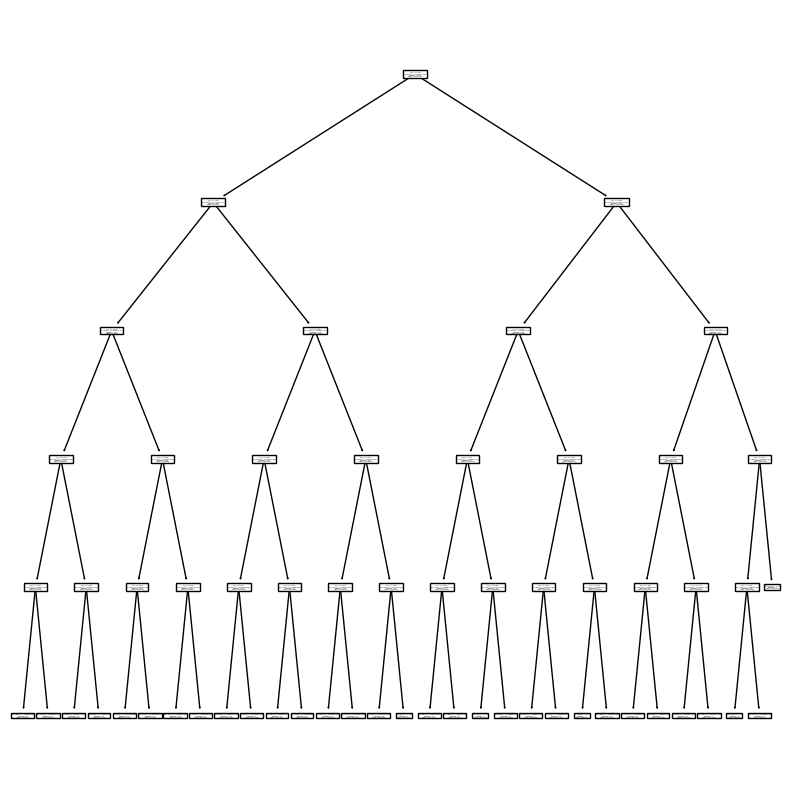

In [25]:
import sklearn
from sklearn import tree
fig, ax = plt.subplots(figsize=(10,10))
sklearn.tree.plot_tree(decision_tree_reg)

In [26]:
from sklearn.ensemble import RandomForestRegressor
rondom_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5,random_state=13)
rondom_forest_reg.fit(X_train,y_train)
model_summary(rondom_forest_reg,'Rondom_Forest_Regression:')

Rondom_Forest_Regression:
Training Accuracy: 0.8810737094617402
Testing Accuracy: 0.8939483596286619
